# 모듈불러오기

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
%matplotlib inline
from scipy import fftpack, fft
import numpy as np
from PIL import Image
import pandas as pd

# 데이터 불러오기

In [0]:
img_data_countour = list()
img_data = list()
for num in range(0,10):
  tmp_img_countour = Image.open(f'./Coffee_Inspection/data/MINIST_SAPLES/{num}_contour.png')
  tmp_img = Image.open(f'./Coffee_Inspection/data/MINIST_SAPLES/{num}.png')
  
  tmp_img_countour = 255 - np.array(tmp_img_countour.convert('L'))
  tmp_img = 255 - np.array(tmp_img.convert('L'))
  
  img_data_countour.append(tmp_img_countour)
  img_data.append(tmp_img)

# 데이터 가공하기

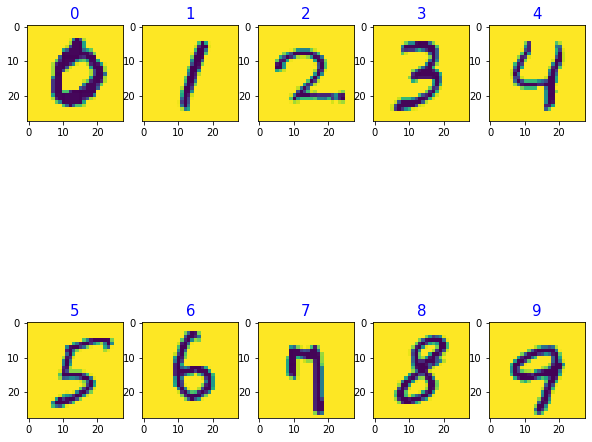

In [0]:
# 컨투어 내부 이미지 구현
fig = plt.figure(figsize = (10,10))

for num in range(1,11):
  ax = fig.add_subplot(2,5,num)
  ax.imshow(img_data[num-1])
  ax.set_title(str(num-1),fontsize = 15, color = 'b')

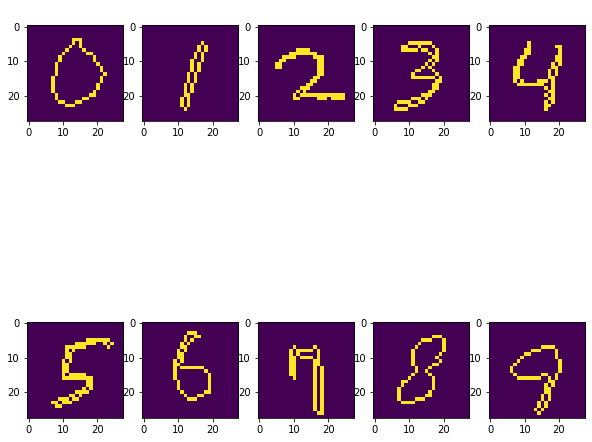

In [0]:
# 컨투어 이미지 확인
fig = plt.figure(figsize = (10,10))

for num in range(1,11):
  ax = fig.add_subplot(2,5,num)
  ax.imshow(img_data_countour[num-1])
  ax.set_title(str(num-1),fontsize = 15, color = 'w')

## 무게중심 구하기

In [0]:
def calculateCenter(img_num):
  # 무게중심 구하기
  img_num = img_num

  height = img_data[img_num].shape[0]
  width = img_data[img_num].shape[1]

  R = list()
  for y in range(height):
    for x in range(width):
      if img_data[img_num][y,x]:            
        R.append([x, (height-y)*1j])

  # 질량의 합
  M = len(R)

  # 질량중심 벡터는 이미지를 기준으로 (x,y) => (height-y)
  R = np.array(R)
  R_x = R[:,0]
  R_y = R[:,1]

  R_x_sum = R_x.sum()
  R_y_sum = R_y.sum()

  center = np.round(R_x_sum/M).real , (np.round(R_y_sum/M)*-1j).real
 
  height_center = center[1]
  width_center = center[0]
  return width_center, height_center, M, R

In [0]:
for i in range(9):
  print(str(i), ':', 'width_center = ', calculateCenter(i)[0], '     ' , 'height_center = ', calculateCenter(i)[1], '     ' , 'M = ', calculateCenter(i)[2])

0:width_center =13.0height_center =15.0M =781
1:width_center =13.0height_center =14.0M =784
2:width_center =14.0height_center =14.0M =783
3:width_center =14.0height_center =14.0M =783
4:width_center =13.0height_center =14.0M =783
5:width_center =13.0height_center =14.0M =783
6:width_center =14.0height_center =15.0M =781
7:width_center =14.0height_center =14.0M =783
8:width_center =13.0height_center =15.0M =783


## 벡터 그리기

In [0]:
# 벡터 그리기
def drawVector(img_num):
  height = img_data_countour[img_num].shape[0]
  width = img_data_countour[img_num].shape[1]

  fig = plt.figure(figsize = (10,10))
  ax = fig.gca()
  ax.set_xlim([-width, 2*width])
  ax.set_ylim([-height,2*height])
  all_vectors = list()
  for y in range(img_data_countour[img_num].shape[0]):
    for x in range(img_data_countour[img_num].shape[1]):
      if img_data_countour[img_num][y,x]:        
        # 이미지 상에서 (x,y)로 나타내자
        all_vectors.append(    [ x-calculateCenter(img_num)[0], (height - y) - calculateCenter(img_num)[1] ])
        ax.quiver(calculateCenter(img_num)[0],calculateCenter(img_num)[1],x-calculateCenter(img_num)[0], (height - y) - calculateCenter(img_num)[1] , angles='xy', scale_units='xy',scale=1, width = 0.001)
        
  sum_vector1 = np.array([np.array(all_vectors)[:,0].sum(), np.array(all_vectors)[:,1].sum()]) # (x,y)
  ax.quiver(calculateCenter(img_num)[0],calculateCenter(img_num)[1],sum_vector1[0], sum_vector1[1] , angles='xy', scale_units='xy',scale=1, color = 'r')

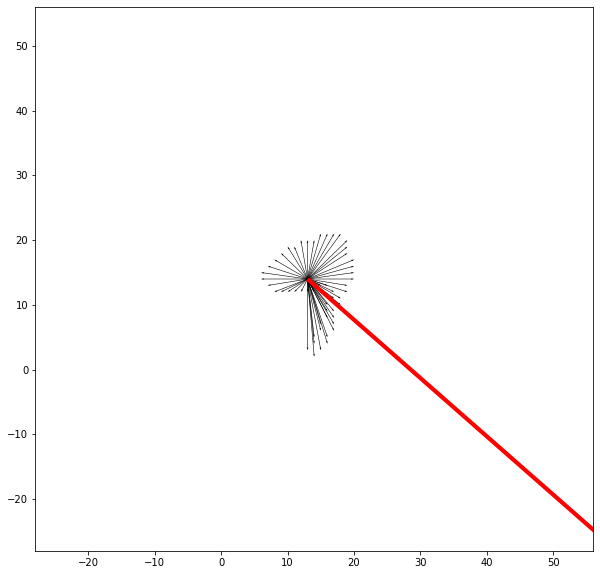

In [0]:
drawVector(9)

## 윤곽벡터 구하기

In [0]:
# 이미지 차원확장
def countourVectors(img_num):
  height = img_data_countour[img_num].shape[0]
  width = img_data_countour[img_num].shape[1]

  all_vectors = list()
  for y in range(img_data_countour[img_num].shape[0]):
    for x in range(img_data_countour[img_num].shape[1]):
      if img_data_countour[img_num][y,x]:        
        # 이미지 상에서 (x,y)로 나타내자
        all_vectors.append(    [ x-calculateCenter(img_num)[0], (height - y) - calculateCenter(img_num)[1] ])
  return np.array(all_vectors)

## 차원확장하기

array([[  2.,   7.],
       [  3.,   7.],
       [  4.,   7.],
       [  5.,   7.],
       [ -1.,   6.],
       [  0.,   6.],
       [  1.,   6.],
       [  6.,   6.],
       [ -3.,   5.],
       [ -2.,   5.],
       [  6.,   5.],
       [ -4.,   4.],
       [  6.,   4.],
       [ -5.,   3.],
       [  7.,   3.],
       [ -6.,   2.],
       [  7.,   2.],
       [ -7.,   1.],
       [  7.,   1.],
       [ -7.,   0.],
       [  7.,   0.],
       [ -6.,  -1.],
       [  2.,  -1.],
       [  3.,  -1.],
       [  6.,  -1.],
       [ -5.,  -2.],
       [ -4.,  -2.],
       [ -3.,  -2.],
       [ -2.,  -2.],
       [ -1.,  -2.],
       [  0.,  -2.],
       [  1.,  -2.],
       [  4.,  -2.],
       [  6.,  -2.],
       [  4.,  -3.],
       [  5.,  -3.],
       [  3.,  -4.],
       [  5.,  -4.],
       [  3.,  -5.],
       [  4.,  -5.],
       [  3.,  -6.],
       [  4.,  -6.],
       [  2.,  -7.],
       [  4.,  -7.],
       [  2.,  -8.],
       [  4.,  -8.],
       [  1.,  -9.],
       [  3.,

In [0]:
img_num = 9
all_vectors = countourVectors(img_num)
all_vectors_size = np.sqrt(all_vectors[:,0]**2 + all_vectors[:,1]**2)
all_vectors_angle = all_vectors[:,1] / all_vectors_size

np.sort(all_vectors_angle)
# tmp = pd.DataFrame(all_vectors_size, all_vectors_angle).reset_index()
# tmp.columns = ['all_vectors_size', 'all_vectors_angle']
# tmp.sort_values(by = 'all_vectors_angle', ascending = True, inplace = True )

# all_vectors_size_adjusted = np.array(tmp['all_vectors_size'])
# all_vectors_angle_adjusted = np.array(tmp['all_vectors_angle'])

# x = np.linspace(0,len(all_vectors_size_adjusted),len(all_vectors_size_adjusted))
# y = all_vectors_size_adjusted / all_vectors_size_adjusted.max()
# theta = all_vectors_angle_adjusted





array([-1.        , -1.        , -0.99654576, -0.99503719, -0.99388373,
       -0.98386991, -0.9701425 , -0.96152395, -0.95782629, -0.9486833 ,
       -0.89442719, -0.89442719, -0.89442719, -0.89442719, -0.86824314,
       -0.85749293, -0.83205029, -0.8       , -0.78086881, -0.70710678,
       -0.62469505, -0.6       , -0.5547002 , -0.51449576, -0.4472136 ,
       -0.4472136 , -0.4472136 , -0.37139068, -0.31622777, -0.31622777,
       -0.16439899, -0.16439899,  0.        ,  0.        ,  0.14142136,
        0.14142136,  0.27472113,  0.31622777,  0.3939193 ,  0.51449576,
        0.5547002 ,  0.6401844 ,  0.70710678,  0.70710678,  0.81373347,
        0.85749293,  0.86824314,  0.91914503,  0.92847669,  0.96152395,
        0.98639392,  0.98639392,  1.        ])

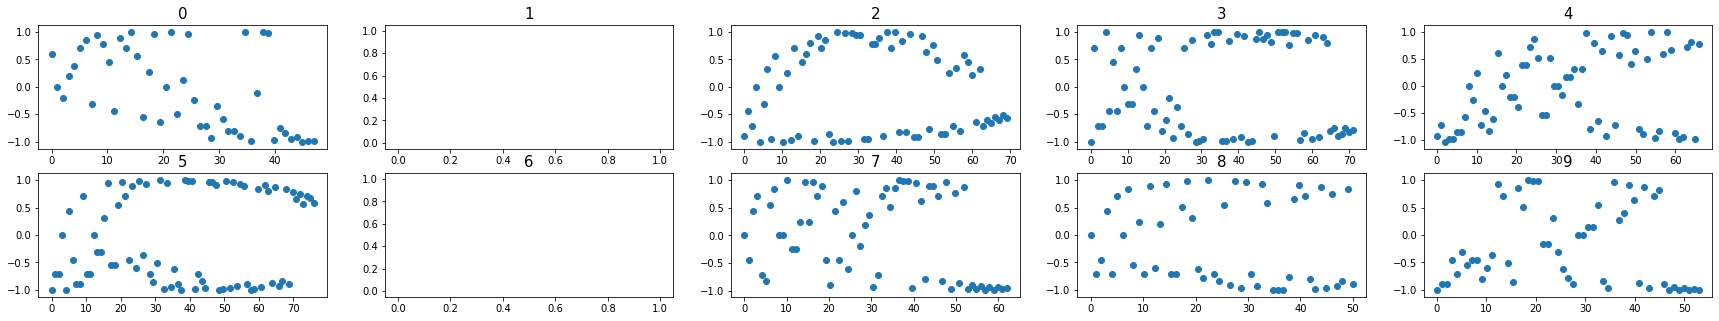

In [0]:
# 컨투어 내부 이미지 구현
fig = plt.figure(figsize = (30,5))

for num in range(1,11):
  ax = fig.add_subplot(2,5,num)
  ax.scatter(dimensionExpansion(num-1)[0],dimensionExpansion(num-1)[1]) 
  ax.set_title(str(num-1),fontsize = 15)